The Analysis is divided into 4 main parts:
1. Data understanding
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis
4. Recommendations/Conclusions

## Importring Necessary Libraries

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  1. Read Data

### There are two datasets on which the analysis has to be carried out and are
1. application_data
2. previous_application

Separate analysis will be carried out for the given two datasets and inferences will be drawn separately.

1. 'application_data.csv'  contains all the information of the client at the time of application.<br>
The data is about whether a client has payment difficulties or not.

In [214]:
application_data = pd.read_csv("C:\\Users\\Maheshwar\\Desktop\\IIT-B\\Case Study\\application_data.csv",sep=",", low_memory=False)

## 2. Data Understanding

In [215]:
print(application_data.head(5))
print(application_data.tail(5))
print(application_data.shape)
print(application_data.info())
print(application_data.describe())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

## Validating all the Column Names 

In [216]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Wrong Data Type Correction 

It Is observed that CNT_FAM_MEMBERS has **Float64** as the data type but family members count can't be float it is a integer value and so converting to **INT**

In [217]:
application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].astype('Int64')

# 3. Data Cleaning

### Finding Duplicates

In [218]:
print(application_data.duplicated().sum())

0


### Check the datatypes of all columns

In [219]:
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

### Missing Values Percentage

In [220]:
# summarising number of missing values in each column
print(application_data.isnull().sum())

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [221]:
# Percentage of null values in all columns
null_percentage = round(application_data.isnull().sum() / len(application_data.index) * 100, 2)
print(null_percentage)

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
FLAG_OWN_REALTY               0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.09
NAME_TYPE_SUITE               0.42
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
REGION_POPULATION_RELATIVE    0.00
DAYS_BIRTH                    0.00
DAYS_EMPLOYED                 0.00
DAYS_REGISTRATION             0.00
DAYS_ID_PUBLISH               0.00
OWN_CAR_AGE                  65.99
FLAG_MOBIL                    0.00
FLAG_EMP_PHONE                0.00
FLAG_WORK_PHONE               0.00
FLAG_CONT_MOBILE              0.00
FLAG_PHONE                    0.00
FLAG_EMAIL                    0.00
OCCUPATION_TYPE     

### You can see that there are no columns have 100% missing values, some have 65%, 31% etc.The colum with 65% of null values is taken into consideration as it has some amount of useful data which can be used for analysis.

### Remove all the columns which have 90 % or more than 90 % null values

In [222]:
app_loan = pd.DataFrame(application_data.loc[:, (null_percentage < 90.00)])
print(round(app_loan.isnull().sum() / len(app_loan.index) * 100, 2))
app_loan.shape

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
FLAG_OWN_REALTY               0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.09
NAME_TYPE_SUITE               0.42
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
REGION_POPULATION_RELATIVE    0.00
DAYS_BIRTH                    0.00
DAYS_EMPLOYED                 0.00
DAYS_REGISTRATION             0.00
DAYS_ID_PUBLISH               0.00
OWN_CAR_AGE                  65.99
FLAG_MOBIL                    0.00
FLAG_EMP_PHONE                0.00
FLAG_WORK_PHONE               0.00
FLAG_CONT_MOBILE              0.00
FLAG_PHONE                    0.00
FLAG_EMAIL                    0.00
OCCUPATION_TYPE     

(307511, 122)

### Check the missing values in each Column against the Total and Percentage

In [223]:
def missing(data):
    miss = data.isnull().sum().sort_values(ascending = False)
    perc = 100*(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    return pd.concat([miss, perc], axis = 1, keys = ['Total', 'Percent'])

In [224]:
missing(app_loan)

,Total,Percent
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35


### Imputing Missing Values

#### Imputing  Missing Values in Numerical Column

There are both categorical and numerical columns that can be imputed.<br>
For Imputing numerical columns mean and median can be choosen.<br>
Column Names choosen for the analysis are
1. AMT_REQ_CREDIT_BUREAU_DAY
2. OWN_CAR_AGE
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. EXT_SOURCE_1
5.AMT_REQ_CREDIT_BUREAU_MON

#### Generic Function to calculate the Mean and Median,given the columns of the dataframe

In [225]:
def describe_app_loan(columns):
    """ 
    Function outputs the mean and median values. 
  
  
    Parameters: 
    columns: List of columns in the dataframe for which the mean and median has to be calculated. 
  
    Returns: 
    mean,median : Returns the calculated mean and median values on the columns specified.
  
    """
    for column in columns:
        print('{column} mean value={mean}, median value={median}'.format(column=column, mean=round(app_loan[column].mean(),2), median=app_loan[column].median()))

In [226]:
describe_app_loan(['AMT_REQ_CREDIT_BUREAU_DAY', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'EXT_SOURCE_1','AMT_REQ_CREDIT_BUREAU_MON'])

AMT_REQ_CREDIT_BUREAU_DAY mean value=0.01, median value=0.0
OWN_CAR_AGE mean value=12.06, median value=9.0
AMT_REQ_CREDIT_BUREAU_WEEK mean value=0.03, median value=0.0
EXT_SOURCE_1 mean value=0.5, median value=0.505997931
AMT_REQ_CREDIT_BUREAU_MON mean value=0.27, median value=0.0


Column_Name                   Missing_Data%    Mean      Median
AMT_REQ_CREDIT_BUREAU_DAY       13.5           0.01       0
OWN_CAR_AGE                     65.99         12.06       9
AMT_REQ_CREDIT_BUREAU_WEEK      13.5           0.03       0
EXT_SOURCE_1                    56.38          0.5        0.51
AMT_REQ_CREDIT_BUREAU_MON       13.5           0.27       0

The main intention of choosing column with varied percentage of missing data was to see how the mean, median varies and which is the best way to impute, two inference were drawn<br>
1. with missing data about 13% the mean and median are approximately 0 indicating the distribution is normal distribution<br>
2. With missing data greater then 50% the mean and median deviates largely makig distribution left/right skewed<br>

1. Imputing is the process of replacing the values with subsituted data. The data can be substituted by Mean, mode, median.<br>
2. It's not recomended to impute any missing data as we don't know the exact value and imputing might mislead the analysis.<br>
3. Missing values can't be imputed with Mean as mean is highly influenced by the outliers present in the dataset.<br>
4. Mode can also be used but it is avoided as their could be more than one mode in the data.<br>
5. Median is the best way to replace as it is not influenced by outliers at all and ther is only one median. .<br>
6. Never 0 should be used to impute any numerical column because if we consider the column OWN_CAR_AGE the value can never be 0 as there is no age 0 and also when yu mean and median the values are going to vary to a larger extent.

#### Imputing  Missing Values in Categorical Column

Missing values in categorical variables can be treated by:
1.Assign them a separate category.All missing values will be treated as a separate category.
2.Find out their distribution by grouping some variables.For example if you want to impute missing values in Gender,you can group by say Age_Bucket,Income_bucket etc and then see the distribution of gender within each group.Then assign the mode value as the value for missing.
3.You can use classification algo’s like random forest,knn etc to impute missing values.

## Deep Look into Numerial Columns

In [227]:
app_loan_num = app_loan.select_dtypes(include=np.number)
app_loan_num.head(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.00,406597.50,24700.50,351000.00,0.02,-9461,-637,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,0,270000.00,1293502.50,35698.50,1129500.00,0.00,-16765,-1188,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,0,67500.00,135000.00,6750.00,135000.00,0.01,-19046,-225,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,0,135000.00,312682.50,29686.50,297000.00,0.01,-19005,-3039,...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,0,121500.00,513000.00,21865.50,513000.00,0.03,-19932,-3038,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


## Deep Look into Categorical Data

In [228]:
app_loan_cat = app_loan.select_dtypes(include='object')
app_loan_cat.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


### Checking for Column Anamolies

#### when observed DAYS_BIRTH,DAYS_EMPLOYED have negative values and has to be treated as there are chances of these columns resulting anamoly.

### DAYS_BIRTH

In [229]:
(app_loan['DAYS_BIRTH'] / -365).describe()

count   307511.00
mean        43.94
std         11.96
min         20.52
25%         34.01
50%         43.15
75%         53.92
max         69.12
Name: DAYS_BIRTH, dtype: float64

 Loans are provided to people within an age range 20-70 years

### Having Standardized way in displaying the decimal columns 

#### For all decimal valued column lets round off the decimals  values to 2 making columns look uniformly

In [230]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)
app_loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,...,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,...,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,...,0.09,0.02,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,0.00,112500.00,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,0.00,147150.00,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367142.50,0.00,1.00,202500.00,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,...,1.00,1.00,1.00,1.00,4.00,9.00,8.00,27.00,261.00,25.00


## Outlier Detection

#### Extreme Value Analysis is the outlier method used for outlier detection.Columns considered are:
1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY

####  Outlier Analysis on AMT_INCOME_TOTAL 

In [231]:
IQR = app_loan_num.AMT_INCOME_TOTAL.quantile(0.75) - app_loan_num.AMT_INCOME_TOTAL.quantile(0.25)
upper_limit = app_loan_num.AMT_INCOME_TOTAL.quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = app_loan_num.AMT_INCOME_TOTAL.quantile(0.75) + (IQR * 3)
upper_limit, upper_limit_extreme

(337500.0, 472500.0)

#### Now, let’s see the ratio of data points above the upper limit & extreme upper limit. ie, the outliers.

In [232]:
total = np.float(app_loan_num.shape[0])
print('Total borrowers: {}'.format(app_loan_num.AMT_INCOME_TOTAL.shape[0]/total))
print('Borrowers that earn > 337k: {}'.format(app_loan_num[app_loan_num.AMT_INCOME_TOTAL>337500].shape[0]/total))
print('Borrowers that earn > 472k: {}'.format(app_loan_num[app_loan_num.AMT_INCOME_TOTAL>472500].shape[0]/total))

Total borrowers: 1.0
Borrowers that earn > 337k: 0.045640643749329295
Borrowers that earn > 472k: 0.009801275401530352


#### We can see that about 4% of the data is above the upper limit and 1% of the data above the extreme upper limit.

####  Outlier Analysis on AMT_CREDIT

In [233]:
IQR = app_loan_num.AMT_CREDIT.quantile(0.75) - app_loan_num.AMT_CREDIT.quantile(0.25)
upper_limit = app_loan_num.AMT_CREDIT.quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = app_loan_num.AMT_CREDIT.quantile(0.75) + (IQR * 3)
upper_limit, upper_limit_extreme

(1616625.0, 2424600.0)

#### Now, let’s see the ratio of data points above the upper limit & extreme upper limit. ie, the outliers.

In [234]:
total = np.float(app_loan_num.shape[0])
print('Total borrowers: {}'.format(app_loan_num.AMT_CREDIT.shape[0]/total))
print('Credits taken > 161k: {}'.format(app_loan_num[app_loan_num.AMT_CREDIT>1616625].shape[0]/total))
print('Credits taken > 224k: {}'.format(app_loan_num[app_loan_num.AMT_CREDIT>2424600].shape[0]/total))

Total borrowers: 1.0
Credits taken > 161k: 0.0213390740493836
Credits taken > 224k: 0.001443850789077464


#### We can see that about 2% of the data is above the upper limit and 0% of the data above the extreme upper limit.

####  Outlier Analysis on AMT_ANNUITY

In [235]:
IQR = app_loan_num.AMT_ANNUITY.quantile(0.75) - app_loan_num.AMT_ANNUITY.quantile(0.25)
upper_limit = app_loan_num.AMT_ANNUITY.quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = app_loan_num.AMT_ANNUITY.quantile(0.75) + (IQR * 3)
upper_limit, upper_limit_extreme

(61704.0, 88812.0)

In [236]:
#### Now, let’s see the ratio of data points above the upper limit & extreme upper limit. ie, the outliers.

In [237]:
total = np.float(app_loan_num.shape[0])
print('Total borrowers: {}'.format(app_loan_num.AMT_ANNUITY.shape[0]/total))
print('Loan annuity > 61704: {}'.format(app_loan_num[app_loan_num.AMT_ANNUITY>61704].shape[0]/total))
print('Loan annuity > 88812: {}'.format(app_loan_num[app_loan_num.AMT_ANNUITY>88812].shape[0]/total))

Total borrowers: 1.0
Loan annuity > 61704: 0.024402379101885786
Loan annuity > 88812: 0.0033299621802146914


#### We can see that about 2% of the data is above the upper limit and 0% of the data above the extreme upper limit.

## Outlier Treatment

#### Most trivial yet effective method of outlier treatment is done by implementing top coding, the outlier is capped at a certain maximum value and looks like many other observations

#### Top Coding of 
1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY

In [238]:
print('Annual Income > 472500: {}'.format(app_loan[app_loan.AMT_INCOME_TOTAL>472500].shape[0]))
print('Percentage of outliers: {}'.format(app_loan[app_loan['AMT_INCOME_TOTAL']>472500].shape[0]/np.float(app_loan.shape[0])))
app_loan.loc[app_loan.AMT_INCOME_TOTAL>472500,'AMT_INCOME_TOTAL'] = 472500
app_loan.AMT_INCOME_TOTAL.max()

Annual Income > 472500: 3014
Percentage of outliers: 0.009801275401530352


472500.0

In AMT_INCOME_TOTAL the Percentage of outliers: 0.009 which is less than 30% and so there is no need split dataframe into outliers and non outliers.

In [239]:
print('Credit Amount > 2424600: {}'.format(app_loan[app_loan['AMT_CREDIT']>2424600].shape[0]))
print('Percentage of outliers: {}'.format(app_loan[app_loan['AMT_CREDIT']>2424600].shape[0]/np.float(app_loan.shape[0])))
app_loan.loc[app_loan.AMT_CREDIT>2424600,'AMT_CREDIT'] = 2424600
app_loan.AMT_CREDIT.max()

Credit Amount > 2424600: 444
Percentage of outliers: 0.001443850789077464


2424600.0

In AMT_CREDIT the Percentage of outliers: 0.001 which is less than 30% and so there is no need split dataframe into outliers and non outliers.

In [240]:
print('Loan Annuity > 88812: {}'.format(app_loan[app_loan['AMT_ANNUITY']>88812].shape[0]))
print('Percentage of outliers: {}'.format(app_loan[app_loan['AMT_ANNUITY']>88812].shape[0]/np.float(app_loan.shape[0])))
app_loan.loc[app_loan.AMT_ANNUITY>88812,'AMT_ANNUITY'] = 88812
app_loan.AMT_ANNUITY.max()

Loan Annuity > 88812: 1024
Percentage of outliers: 0.0033299621802146914


88812.0

In AMT_ANNUITY the Percentage of outliers: 0.003 which is less than 30% and so there is no need split dataframe into outliers and non outliers.

#### Since the percentage of outliers are 0.9%, 0.1% and 0.3% respectively.Using Top Coding technique the outliers are capped and the data is effectively clean for further analysis and also  the maximum value will be displayed will be equal to the upper_limit_extreme values in their respective columns.

## Boxplot after Outlier Analysis

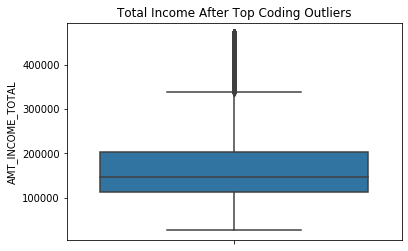

In [241]:
sns.boxplot(y='AMT_INCOME_TOTAL', data = app_loan)
plt.title("Total Income After Top Coding Outliers")
plt.show()

#### No points in the dataset lies "two far away" from the whiskers.Indicating there is are no outliers and dataset has been effectively treated.

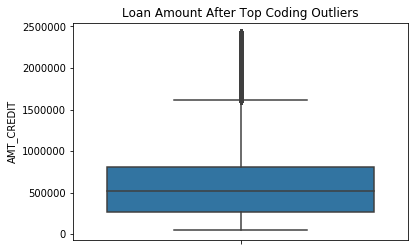

In [242]:
sns.boxplot(y='AMT_CREDIT', data = app_loan)
plt.title("Loan Amount After Top Coding Outliers")
plt.show()

#### No points in the dataset lies "two far away" from the whiskers.Indicating there is are no outliers and dataset has been effectively treated.

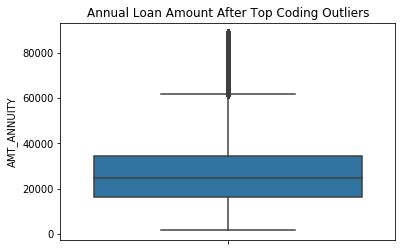

In [243]:
sns.boxplot(y='AMT_ANNUITY', data = app_loan)
plt.title("Annual Loan Amount After Top Coding Outliers")
plt.show()

#### No points in the dataset lies "two far away" from the whiskers.Indicating there is are no outliers and dataset has been effectively treated.

## Binning Of Continuous Variables

### Create bins for range of Loan Annuity

In [244]:
bins = [0, 15000, 30000, 45000, 60000, 75000,90000]
slot = ['0-15000', '15000-30000', '30000-45000', '45000-60000', '60000-75000','75000 and above']
app_loan['AMT_ANNUITY_RANGE'] = pd.cut(app_loan['AMT_ANNUITY'], bins, labels=slot)

### Create bins for range of Total Income Amount

In [245]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 1200000]
slot = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000','100000 and above']
app_loan['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_loan['AMT_INCOME_TOTAL'], bins, labels=slot)

## 4. Analysis

### Choose the columns to perform analysis and draw conclusion based on the values obtained after performing Analusis on these columns

In [246]:
app_loan = app_loan[['SK_ID_CURR','AMT_ANNUITY','DAYS_EMPLOYED','AMT_GOODS_PRICE','CNT_CHILDREN','AMT_CREDIT','EXT_SOURCE_1','AMT_INCOME_TOTAL','TARGET','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_MON','OWN_CAR_AGE','CNT_FAM_MEMBERS','DAYS_BIRTH','REGION_POPULATION_RELATIVE','NAME_HOUSING_TYPE','NAME_INCOME_TYPE' ,'NAME_EDUCATION_TYPE','FLAG_OWN_REALTY','ORGANIZATION_TYPE','HOUSETYPE_MODE',  'NAME_FAMILY_STATUS','NAME_TYPE_SUITE','NAME_CONTRACT_TYPE','OCCUPATION_TYPE','FLAG_OWN_CAR','CODE_GENDER','EXT_SOURCE_2', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_3']]

## Examine the distribution of Target Column

The target is what we are asked to predict has 2 values 
1. 0 for the loan was repaid on time
2. 1 indicating the client had payment difficulties. 
Let's find out the Imbalance Percentage from the target variable by counting the values in each category

In [247]:
app_loan['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [248]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = app_loan[app_loan['TARGET']== 0]["TARGET"].value_counts().index.values,
            y = app_loan[app_loan['TARGET']== 0]["TARGET"].value_counts().values,
            name="Paid"
    )

trace1 = go.Bar(
            x = app_loan[app_loan['TARGET']== 1]["TARGET"].value_counts().index.values,
            y = app_loan[app_loan['TARGET']== 1]["TARGET"].value_counts().values,
            name="Deafulter"
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Imbalance Graph'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')


From the above graph it is clear that,<br>
1. From 307511 loanee, 282686 are Non-defaulters and 24825 are Defaulters.
2. The loans that were repaid on time are more compared to once that were not paid. 
3. This is classic example of **__IMBALANCED CLASS PROBLEM__**.

## **Percentage of Imbalce** in the **TARGET** column is as calculated below

Imbalance % = (Number of rows of Class 1/ Number of rows of Class 0)*100

In [249]:
print(24825/282686 * 100)

8.781828601345662


#### Around 9% target column is imbalanced.

## Divide the dataframe into 2 based on Target Column values

### Further to analyse the entire dataset based on the paid and deafaulter values on the **TARGET** column, we divide the dataset into 2 dataframes as 
1. df1 consisting of all loan paid on time i.e. TARGET=0
2. df2 consisting of all loan which are pending i.e. TARGET=1 

In [250]:
df1 = app_loan[app_loan['TARGET'] == 0]
df1.describe()

,SK_ID_CURR,AMT_ANNUITY,DAYS_EMPLOYED,AMT_GOODS_PRICE,CNT_CHILDREN,AMT_CREDIT,EXT_SOURCE_1,AMT_INCOME_TOTAL,TARGET,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_MON,OWN_CAR_AGE,CNT_FAM_MEMBERS,DAYS_BIRTH,REGION_POPULATION_RELATIVE,EXT_SOURCE_2,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_3
count,282686.00,282674.00,282686.00,282429.00,282686.00,282686.00,124079.00,282686.00,282686.00,282429.00,245459.00,97006.00,282684.00,282686.00,282686.00,282078.00,282686.00,282686.00,227398.00
mean,278244.74,27089.91,65696.15,542736.80,0.41,602354.30,0.51,166599.26,0.00,542736.80,0.27,11.94,2.15,-16138.18,0.02,0.52,-5029.94,-3017.22,0.52
std,102825.78,14194.30,142877.81,373785.49,0.72,405301.12,0.21,83606.10,0.00,373785.49,0.93,11.89,0.91,4364.20,0.01,0.19,3538.46,1506.61,0.19
min,100003.00,1615.50,-17912.00,40500.00,0.00,45000.00,0.01,25650.00,0.00,40500.00,0.00,0.00,1.00,-25229.00,0.00,0.00,-24672.00,-7197.00,0.00
25%,189103.25,16456.50,-2813.00,238500.00,0.00,270000.00,0.35,112500.00,0.00,238500.00,0.00,5.00,2.00,-19793.75,0.01,0.41,-7550.00,-4313.00,0.39
50%,278362.50,24876.00,-1235.00,450000.00,0.00,517788.00,0.52,148500.00,0.00,450000.00,0.00,9.00,2.00,-15877.00,0.02,0.57,-4544.00,-3295.00,0.55
75%,367241.50,34749.00,-278.00,688500.00,1.00,810000.00,0.68,202500.00,0.00,688500.00,0.00,15.00,3.00,-12536.00,0.03,0.67,-2045.00,-1755.00,0.67
max,456255.00,88812.00,365243.00,4050000.00,19.00,2424600.00,0.96,472500.00,0.00,4050000.00,27.00,91.00,20.00,-7489.00,0.07,0.85,0.00,0.00,0.89


In [251]:
df2 = app_loan[app_loan['TARGET'] == 1]
df2.describe()

,SK_ID_CURR,AMT_ANNUITY,DAYS_EMPLOYED,AMT_GOODS_PRICE,CNT_CHILDREN,AMT_CREDIT,EXT_SOURCE_1,AMT_INCOME_TOTAL,TARGET,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_MON,OWN_CAR_AGE,CNT_FAM_MEMBERS,DAYS_BIRTH,REGION_POPULATION_RELATIVE,EXT_SOURCE_2,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_3
count,24825.00,24825.00,24825.00,24804.00,24825.00,24825.00,10054.00,24825.00,24825.00,24804.00,20533.00,7576.00,24825.00,24825.00,24825.00,24773.00,24825.00,24825.00,19148.00
mean,277449.17,26468.00,42394.68,488972.41,0.46,557583.48,0.39,159497.29,1.00,488972.41,0.23,13.67,2.18,-14884.83,0.02,0.41,-4487.13,-2732.10,0.39
std,102383.12,12365.89,119484.63,311636.50,0.76,345166.53,0.20,76312.20,0.00,311636.50,0.75,12.50,0.95,4192.84,0.01,0.21,3299.65,1516.98,0.21
min,100002.00,2722.50,-16069.00,45000.00,0.00,45000.00,0.01,25650.00,1.00,45000.00,0.00,0.00,1.00,-25168.00,0.00,0.00,-22928.00,-6207.00,0.00
25%,189555.00,17361.00,-2156.00,238500.00,0.00,284400.00,0.22,112500.00,1.00,238500.00,0.00,6.00,2.00,-18037.00,0.01,0.24,-6646.00,-4119.00,0.22
50%,276291.00,25263.00,-1034.00,450000.00,0.00,497520.00,0.36,135000.00,1.00,450000.00,0.00,11.00,2.00,-14282.00,0.02,0.44,-4056.00,-2797.00,0.38
75%,366050.00,32976.00,-379.00,675000.00,1.00,733315.50,0.54,202500.00,1.00,675000.00,0.00,17.00,3.00,-11396.00,0.03,0.59,-1671.00,-1392.00,0.55
max,456254.00,88812.00,365243.00,3600000.00,11.00,2424600.00,0.93,472500.00,1.00,3600000.00,17.00,91.00,13.00,-7678.00,0.07,0.81,0.00,0.00,0.90


# Univariate Analysis

## Continuous Variables

####  In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

## Categorical Variables

#### For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

### Note: Target 0 and Target 1 data has been plotted side by side

In [252]:
def uni_cat_plot(data, col, size=[12 ,6], xlabel_angle=0, title=''):
    """ 
    Compare categorical Column distibution between Target 0(Non-Defaulters) and Target 1(Defaulters). 
  
    Parameters: 
    data         :  Dataframe
    col          :  Categorical Column
    size         :  size of graph
    xlabel_angle :  rotation of x label
    title        :  Graph title
  
    Returns: 
    Barplot of categorical variables 
  
    """
    plt.figure(figsize = size)
    l1 = app_loan.loc[app_loan.TARGET==0, col].value_counts()
    l0 = app_loan.loc[app_loan.TARGET==1, col].value_counts()
    plt.subplot(1,2,1)
    sns.barplot(x = l1.index, y=l1.values)
    plt.title('Non-Defaulter: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.subplot(1,2,2)
    sns.barplot(x = l0.index, y=l0.values)
    plt.title('Defaulter: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.show()

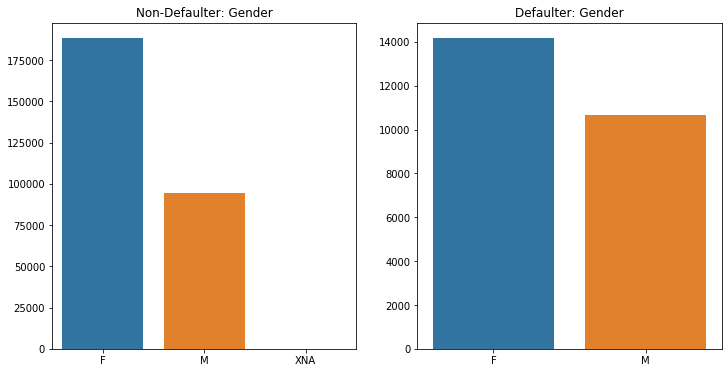

In [253]:
uni_cat_plot(app_loan, 'CODE_GENDER', title='Gender')

From the above graph it is clear that,
1. Most of the loan takers are female.
2. Out of 202448 Female loan takers, Non-Defaulters are 188278 and 14170 are defaulters.
3. Out of 105059 Male loan takers, Non-Defaulters are 94404 and 10655 are defaulters.
4. As per money lended to Female and Male, 93% of loan takers are Non-Defaulters in Female and 89.85% of loan takers are Non-Defaulters in Male.

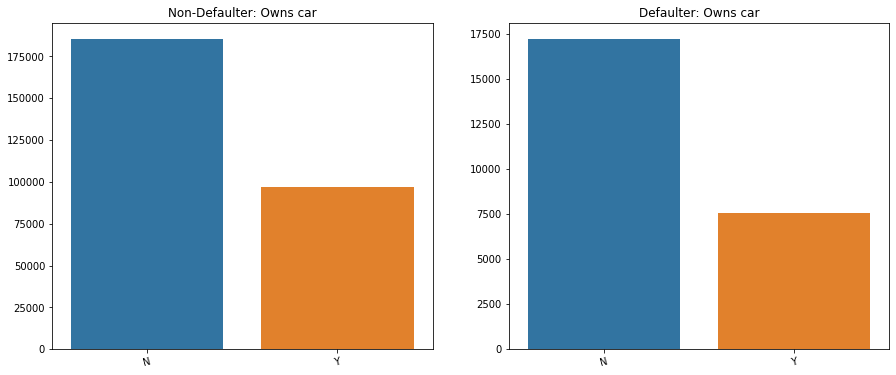

In [254]:
uni_cat_plot(app_loan, 'FLAG_OWN_CAR', size=[15 ,6], xlabel_angle=15, title='Owns car')

From the above graph it is clear that,
1. N = 202924: Non-Defaulter = 185675(91.49%), Defaulter = 17249(8.5%)
2. Y = 104587: Non-Defaulter = 97011(92.75%), Defaulter = 7576(7.24%)

Those owns car  are less likely to default than those who does not owns the car although the difference is not much.

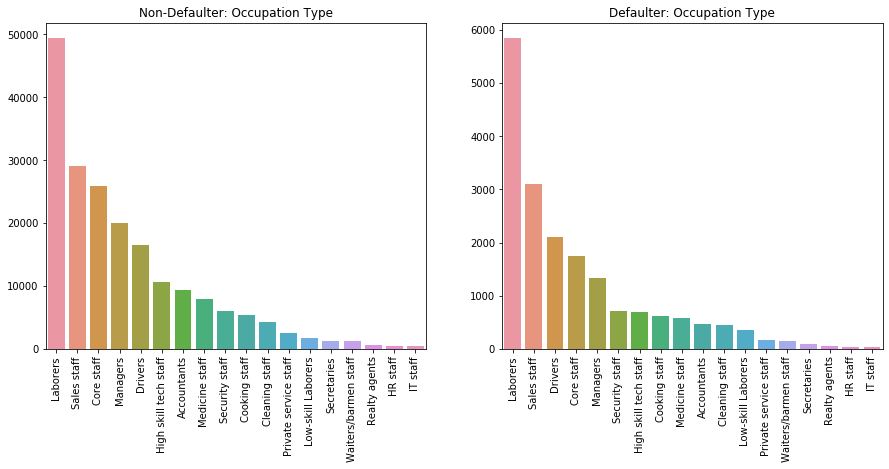

In [255]:
uni_cat_plot(app_loan, 'OCCUPATION_TYPE', size=[15 ,6], xlabel_angle=90, title='Occupation Type')

From the above graph it is clear that,
1. Highest Defaulters are Labuorers,Sales Staff,Drivers and Core Staff.
2. Highest Non-Defaulters are Labuorers,Sales Staff,Drivers and Managers.
3. So there is a pattern that the maximum loan availaing category are Labuorers,Sales Staff and Drivers.
4. As their income is not fixed and also it depends on the business, if they have profit they repay the loan else they become defaulters.
5. Laborers = 55186: Non Defaulters = 49348, Defaulters = 5838
6. Sales staff = 32102: Non-Defaulters = 29010, Defaulters = 3092
7. Core staff = 27570: Non-Defaulters = 25832, Defaulters = 1738

 10.57% of Laborers are defaulters, 9.63% of Sales staff are defaulters and only 6.3% of Core staff are defaulters. Laborers are delaying in the payment of loan as compare to sales staff and core staff.

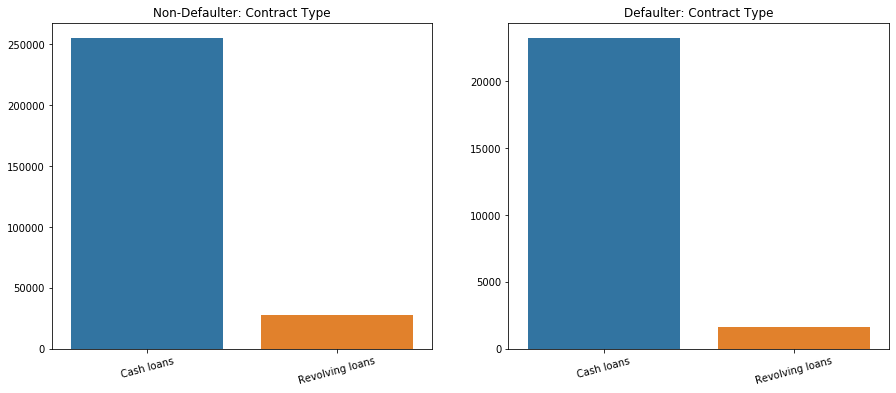

In [256]:
uni_cat_plot(app_loan, 'NAME_CONTRACT_TYPE', size=[15 ,6], xlabel_angle=15, title='Contract Type')

From the above graph it is clear that,
1. Cash loans clients = 278232: Defaulter = 23221(8.34%), Non Defaulter = 255011(91.6%)
2. Revolving loans Clients = 29279: Defaulter = 1604(5.45%), Non-Defaulter = 27675(94.5%)

Those clients who take revolving loans tend to default more than those clients who take cash loans.  

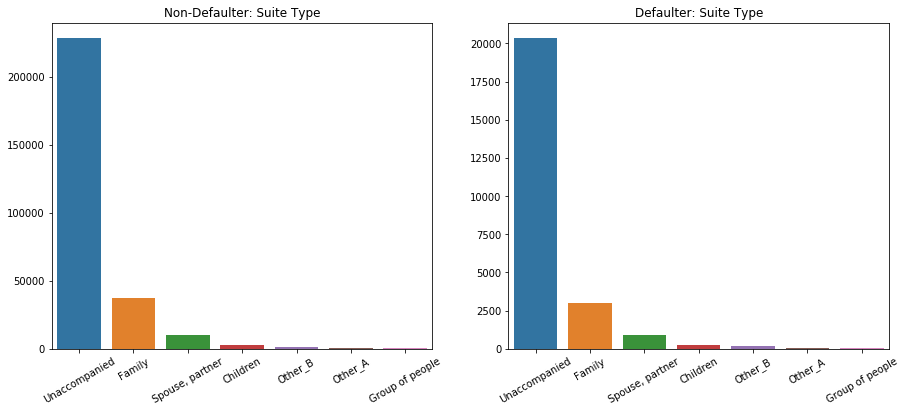

In [257]:
uni_cat_plot(app_loan, 'NAME_TYPE_SUITE', size=[15 ,6], xlabel_angle=30, title='Suite Type')

From the above graph it is clear that,
1. Unaccompanied Clients = 248526: Defaulter = 20337(8.18%), Non-Defaulter = 228189(91.81%)
2. Family = 40149: Defaulter = 3009(7.49%), Non-Defaulter = 37140(92.5%)
3. Spouse, partner = 11370: Defaulter = 895(7.8%), Non-Defaulter = 10475(92.12%)

From above plot we can say all the clients whether Unaccomapnied or with Family or living with Spouse, partner are unable to pay there loans. No one is more defaulter or less.

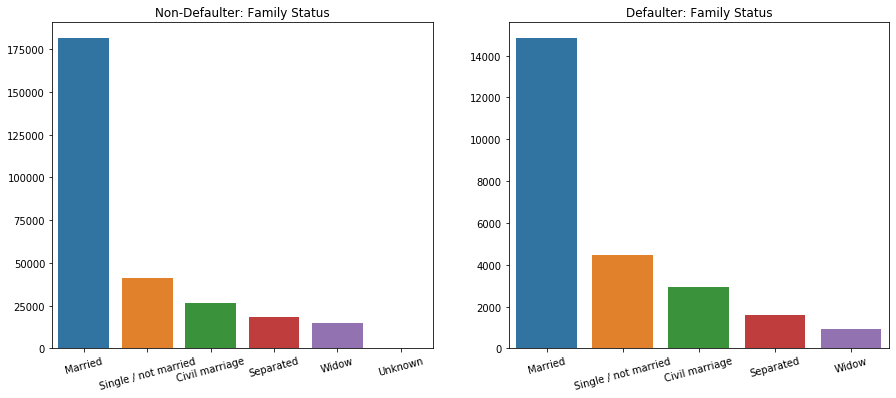

In [258]:
uni_cat_plot(app_loan, 'NAME_FAMILY_STATUS', size=[15 ,6], xlabel_angle=15, title='Family Status')

From the above graph it is clear that,
1. Married = 206432: Defaulter = 14850(7.19%), Non-defaulter = 181582(87.9%)
2. Single/not married = 45444: Defaulter = 4457(9.8%), Non-Defaulter = 40987(90.19%)
3. Civil Marriage = 29775: Defaulter = 2961(9.94%), Non-Defaulter = 29814(90.0%)
4. Separated = 19770: Defaulter = 1620(8.19%), Non-Defaulter = 18150(91.8%)

Married are the least defaulters among family status. Single or not married are defaulters.

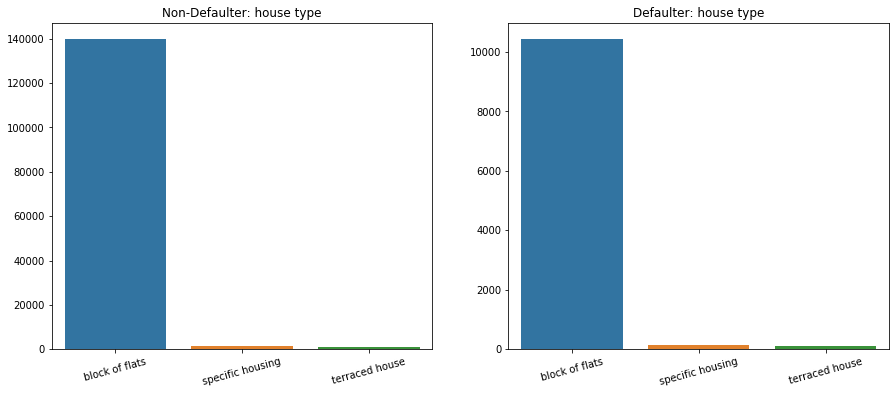

In [259]:
uni_cat_plot(app_loan, 'HOUSETYPE_MODE', size=[15 ,6], xlabel_angle=15, title='house type')

From the above graph it is clear that,
1. Blocks of flats = 150503: Default = 10450(6.94), Non-Defaulter = 140053(93.0%)
2. specific housing = 1499: Default = 152(10.14%), Non-Defaulter = 1347(89.85%)

The clients who live in Specific housing have a tendency to default. 10.14% clients belong to specific Housing defaults as compare to Blocks of flats which is 6.94%

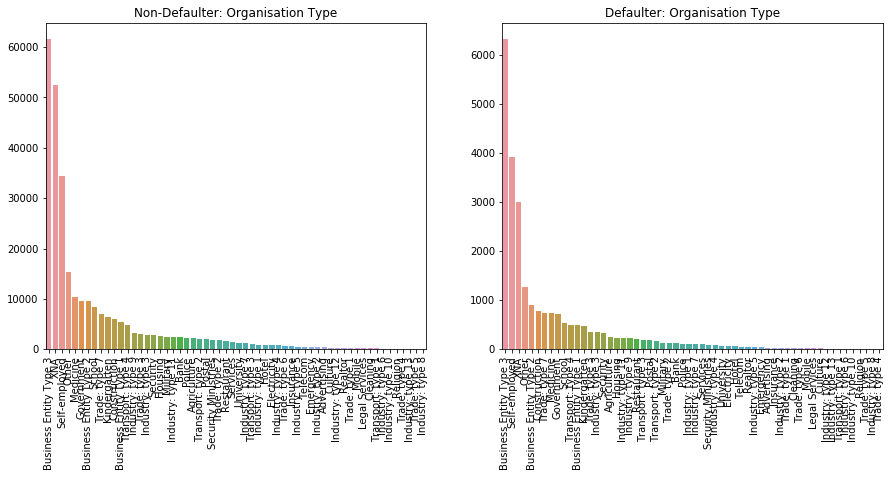

In [260]:
uni_cat_plot(app_loan, 'ORGANIZATION_TYPE', size=[15 ,6], xlabel_angle=90, title='Organisation Type')

From the above graph it is clear that,
1. Business Entity Type 3 = 67992: Defaulter = 6323(9.29%), Non-Defaulter = 61669(90.77%)
2. Self employed = 38412: Defaulter = 3908(10.17%), Non-Defaulter = 34504(89.82%)
3. Medicine = 11193: Defaulter = 737(6.58%), Non-Defaulter = 10456(93.4%)
4. Government = 10404: Defaulter = 726(6.97%), Non-Defaulter = 9678(93.0%)

Business Entity clients default the most as compared to others. The least defaulters are government employees

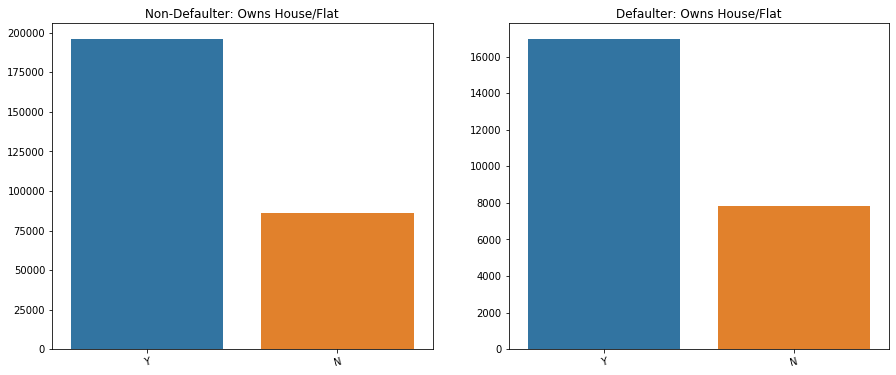

In [261]:
uni_cat_plot(app_loan, 'FLAG_OWN_REALTY', size=[15 ,6], xlabel_angle=15, title='Owns House/Flat')

From the above graph it is clear that,
1. From 24825 defulters, 16983 are staying in their own house.
2. From 282686 Non-defaulters, 196329 are staying in their own house.

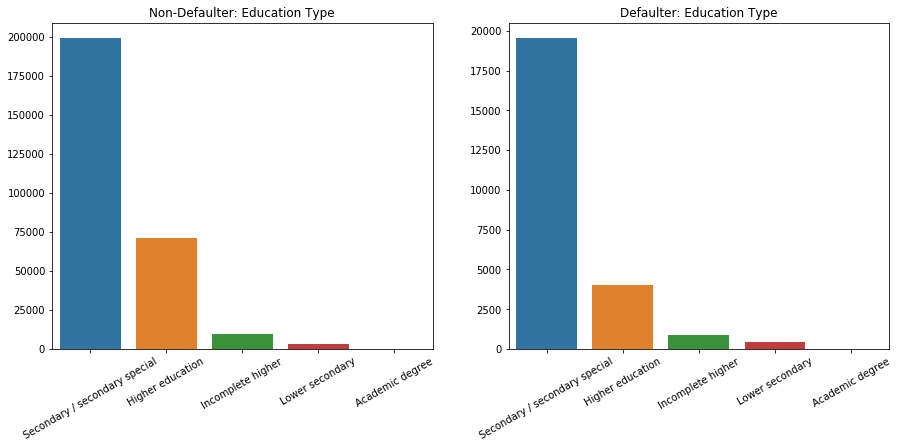

In [262]:
uni_cat_plot(app_loan, 'NAME_EDUCATION_TYPE', size=[15 ,6], xlabel_angle=30, title='Education Type')

From the above graph it is clear that,
1. Out of 218391 Secondary/secondary special, 190000 are Non-Defaulter and 18000 are Defaulter.
2. Out of 74863 Higher education, 3400 are Defaulters and 71463 are Non-Defaulters. 
3. Out of 10277 Incomplete higher,  are Defaulters and  are Non defaulters

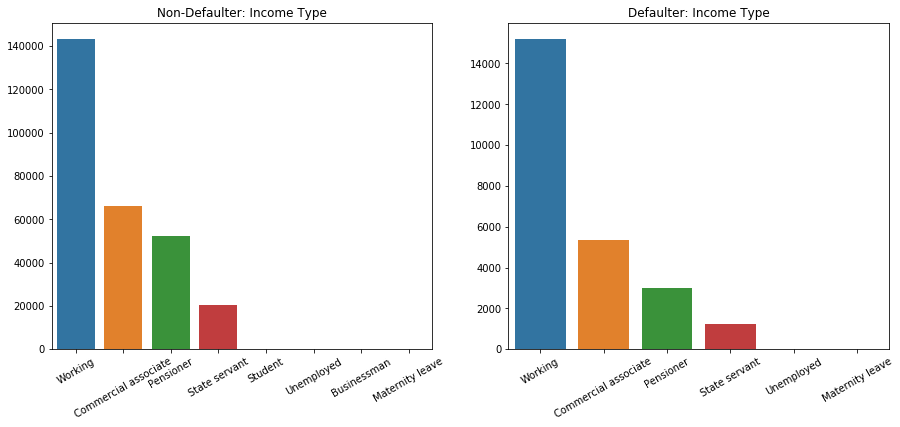

In [263]:
uni_cat_plot(app_loan, 'NAME_INCOME_TYPE', size=[15 ,6], xlabel_angle=30, title='Income Type')

From the above graph it is clear that,
1.	Out of 158774 Working Income Type, 140000 of working are Non-Defaulter and 18774 are Defaulter type.
2.	Out of 71617 Commercial associate Income type, 65717 are Non-defaulter and 5900 are Defaulter
3.	Out of 55362 Pensioner Income type, almost 51000 are Non-Defaulter and 3000 are Defaulter
4.	Out of 21703 State servant, 20000 State servants are Non-defaulter and 1703 are Defaulter.

From the above data we can conclude that working type income people are among most defaulters almost 11.8% as compare to others.
Pensioner are least defaulter with 5.41%. Its safe to give them loan.

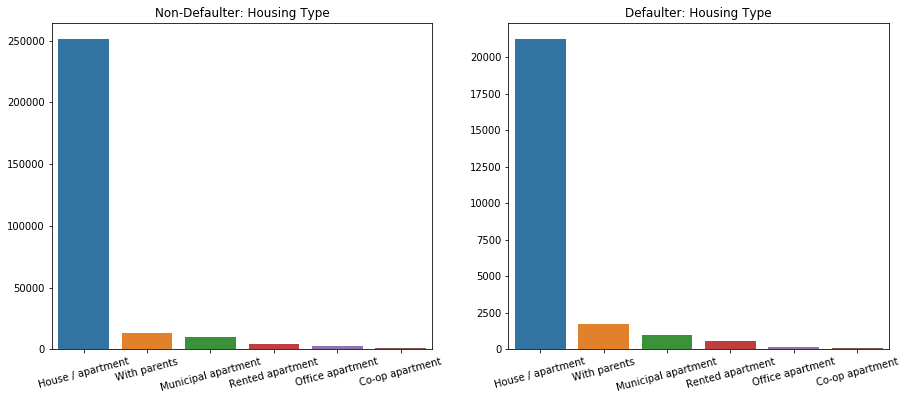

In [264]:
uni_cat_plot(app_loan, 'NAME_HOUSING_TYPE', size=[15 ,6], xlabel_angle=15, title='Housing Type')

From the above graph it is clear that,
1.	Out of 272868 Housing/apartments, 250000 are Non-Defaulters and 22868 are Defaulters.
2.	Out of 14840 clients living with their parents, 2300 are Defaulters and 12540 are Non-Defaulters

In [265]:
def uni_num_plot(data, col, size=[8, 4], bins=50):
    """ 
    Compare Numerical Column distibution between Target 0(Non-Defaulters) and Target 1(Defaulters). 
  
    Parameters: 
    data         :  Dataframe
    col          :  Categorical Column
    size         :  size of graph
    bins         :  number of buckets to smoothen the data
  
    Returns: 
    Barplot of categorical variables 
  
    """
    plt.figure(figsize=[12, 6])
    l1 = app_loan.loc[app_loan.TARGET==0, col]
    l0 = app_loan.loc[app_loan.TARGET==1, col]
    plt.subplot(1,2,1)
    sns.distplot(l1.dropna(), kde=True,bins=bins)
    plt.title('Non-Defaulter: Distribution of %s' % col)
    plt.subplot(1,2,2)
    sns.distplot(l0.dropna(), kde=True,bins=bins)
    plt.title('Defaulter: Distribution of %s' % col)
    plt.show()

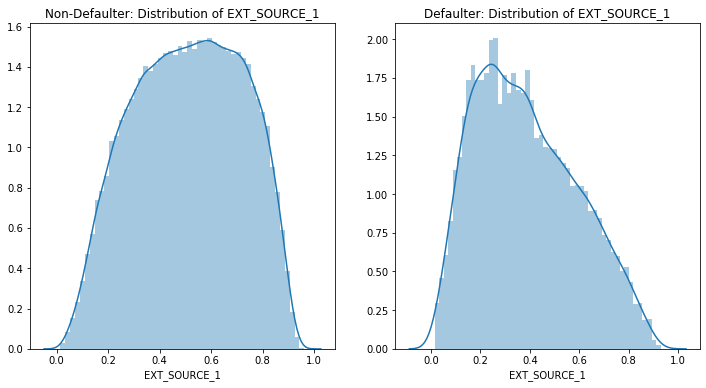

In [266]:
uni_num_plot(app_loan, 'EXT_SOURCE_1', bins=50)

From the above grph it is clear that,
1. Non-defaulter distribution of EXT_SOURCE_1 is uniform.
2. defaulter distribution of EXT_SOURCE_1 is more left skewed having median.mode at the left of the curve.

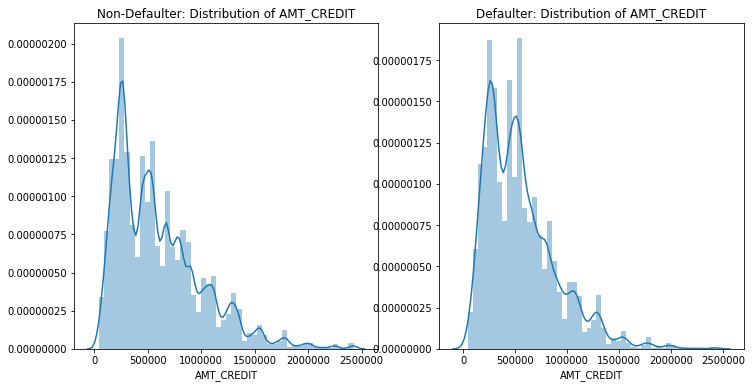

In [267]:
uni_num_plot(app_loan, 'AMT_CREDIT', bins=50)

From the above graph it is clear that,
1. Total Client = 307511
2. Out of the total clients 282686 are the ones who are Non Defaulter and remaining 24825 are Defaulters. 
3. Within defaulters, large clients belongs to the range of loaning amount of 500000 - 1000000. 

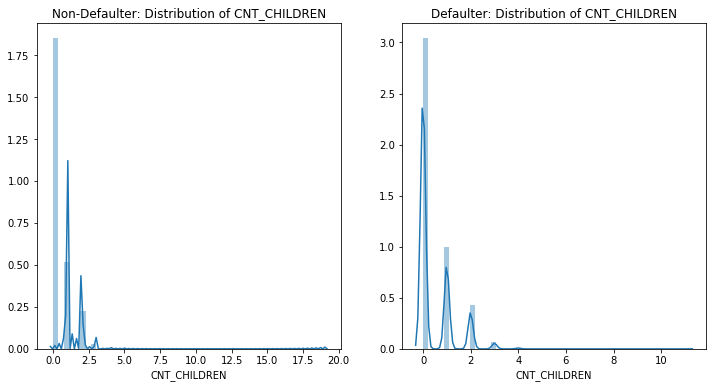

In [268]:
uni_num_plot(app_loan, 'CNT_CHILDREN', bins=50)

From the above graph it is clear that,
1. 0 child Clients = 215371, Defaulter = 16609(7.71%), Non-Defaulter = 198762(92.28%)
2. 1 child Clients = 61119, Defaulter = 5454(8.9%), Non Defaulter = 55665(91.0%)
3. 2 child Clients = 26749, Defaulter = 2333(8.7%), Non-Defaulter = 24416(91.27%)

As it can be seen from the graph higher the number of children more likelyhood of the clients that it can default in payment of loan.

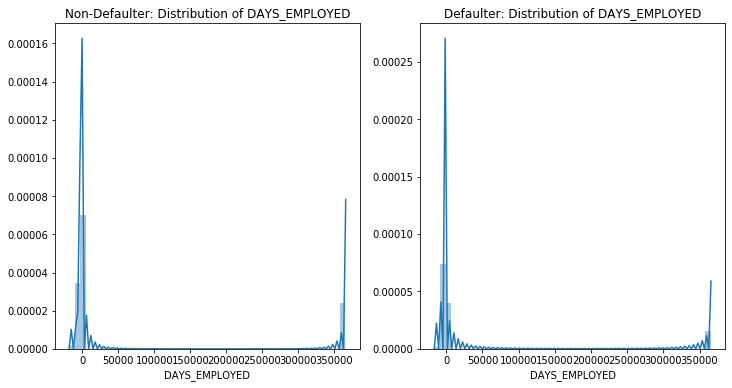

In [269]:
uni_num_plot(app_loan, 'DAYS_EMPLOYED', bins=50)

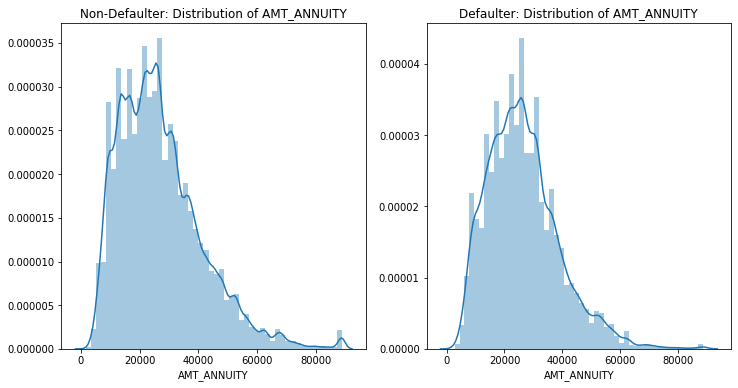

In [270]:
uni_num_plot(app_loan, 'AMT_ANNUITY', bins=50)

In [271]:
df1_num = df1[['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
df1_cat= df1[['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']]

In [272]:
df2_num = df2[['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
df2_cat= df2[['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']]

## Correlation of numerical variables with Defaulter and Non-Defaulter

Most Positive Correlations: 
                  SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
DAYS_ID_PUBLISH       -0.00     nan         -0.03              0.03   
CNT_FAM_MEMBERS       -0.00     nan          0.88              0.04   
EXT_SOURCE_1           0.00     nan         -0.14              0.09   
EXT_SOURCE_2           0.00     nan         -0.02              0.17   
EXT_SOURCE_3           0.00     nan         -0.04             -0.08   

                 AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AMT_GOODS_PRICE  \
DAYS_ID_PUBLISH       -0.00         0.02            -0.00            -0.00   
CNT_FAM_MEMBERS        0.06         0.08             0.06             0.06   
EXT_SOURCE_1           0.17         0.12             0.17             0.17   
EXT_SOURCE_2           0.13         0.13             0.14             0.14   
EXT_SOURCE_3           0.04         0.03             0.04             0.04   

                 REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \


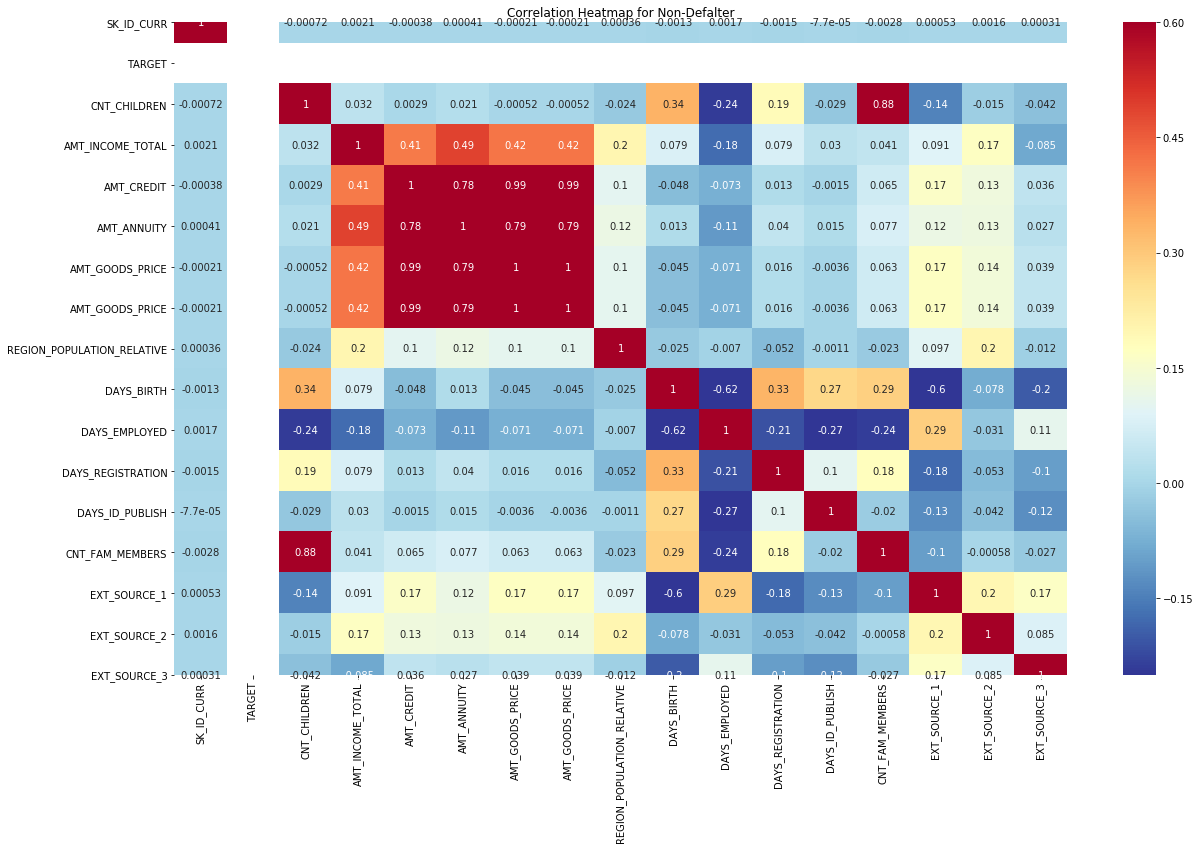

In [273]:
corr_mat1 = df1_num.corr()
plt.subplots(figsize=(20,12))
sns.heatmap(corr_mat1, cmap = plt.cm.RdYlBu_r, annot = True, vmin = -0.25, vmax=0.6)
plt.title('Correlation Heatmap for Non-Defalter')

# Display correlations
print('Most Positive Correlations: \n', corr_mat1.tail(5))
print('\nMost Negative Correlations: \n', corr_mat1.head(5))

Most Positive Correlations: 
                  SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
DAYS_ID_PUBLISH       -0.00     nan         -0.03             -0.00   
CNT_FAM_MEMBERS       -0.00     nan          0.89              0.01   
EXT_SOURCE_1          -0.00     nan         -0.09              0.09   
EXT_SOURCE_2           0.01     nan         -0.01              0.14   
EXT_SOURCE_3          -0.01     nan         -0.02             -0.07   

                 AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AMT_GOODS_PRICE  \
DAYS_ID_PUBLISH       -0.05        -0.02            -0.06            -0.06   
CNT_FAM_MEMBERS        0.05         0.08             0.05             0.05   
EXT_SOURCE_1           0.18         0.11             0.19             0.19   
EXT_SOURCE_2           0.12         0.12             0.13             0.13   
EXT_SOURCE_3           0.08         0.04             0.08             0.08   

                 REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \


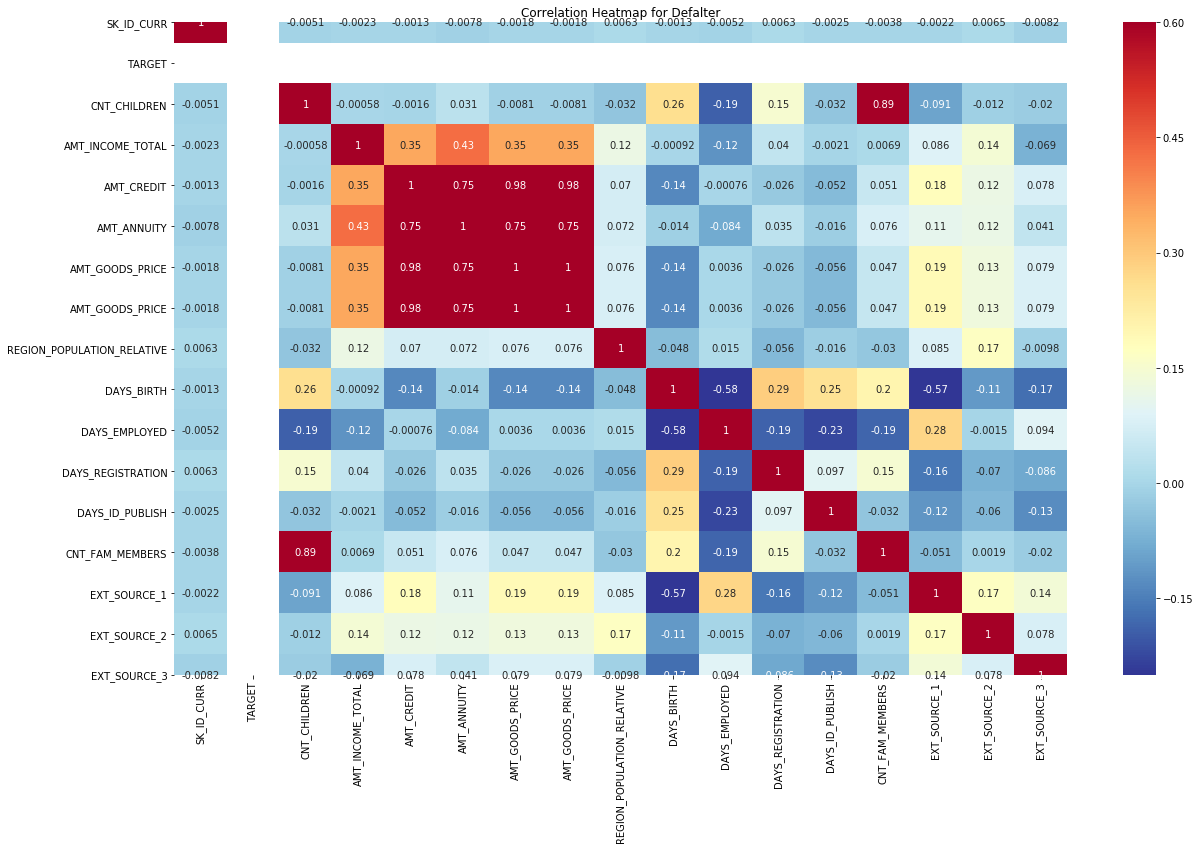

In [274]:
corr_mat2 = df2_num.corr()
plt.subplots(figsize=(20,12))
sns.heatmap(corr_mat2, cmap = plt.cm.RdYlBu_r, annot = True, vmin = -0.25, vmax=0.6)
plt.title('Correlation Heatmap for Defalter')

# Display correlations
print('Most Positive Correlations: \n', corr_mat2.tail(5))
print('\nMost Negative Correlations: \n', corr_mat2.head(5))

In [275]:
correlations = app_loan.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 OWN_CAR_AGE         0.04
DAYS_REGISTRATION   0.04
DAYS_ID_PUBLISH     0.05
DAYS_BIRTH          0.08
TARGET              1.00
Name: TARGET, dtype: float64

Most Negative Correlations: 
 EXT_SOURCE_3      -0.18
EXT_SOURCE_2      -0.16
EXT_SOURCE_1      -0.16
DAYS_EMPLOYED     -0.04
AMT_GOODS_PRICE   -0.04
Name: TARGET, dtype: float64


### Most Positive Correlations: 
OWN_CAR_AGE         0.04
DAYS_REGISTRATION   0.04
DAYS_ID_PUBLISH     0.05
DAYS_BIRTH          0.08
TARGET              1.00


Most Negative Correlations: 
EXT_SOURCE_3      -0.18
EXT_SOURCE_2      -0.16
EXT_SOURCE_1      -0.16
DAYS_EMPLOYED     -0.04
AMT_GOODS_PRICE   -0.04

## Bivariate/Multivariate Analysis

### Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous

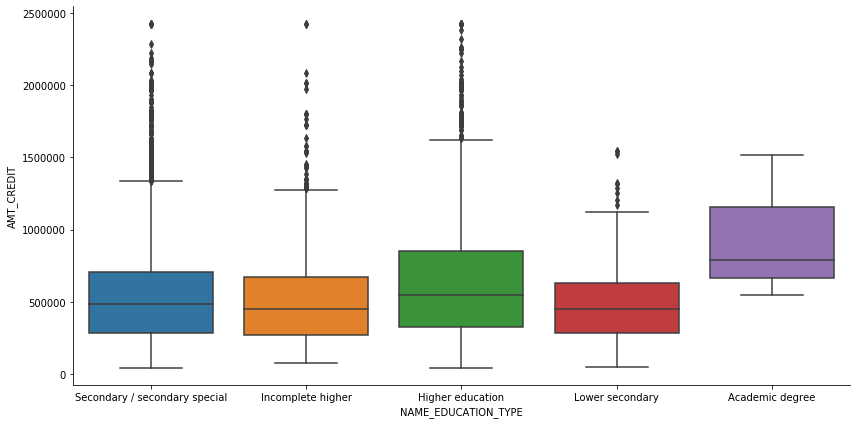

In [276]:
#Defaulters arranged by education type and credit range
sns.catplot(y="AMT_CREDIT", x="NAME_EDUCATION_TYPE", kind="box", data=df2, height=6,aspect=2)

From the above graph it is clear that,
1. Higher Education, they default the most. Academic Degree clients box plot is condensed. 
2. In Academic Degree, the part above the median is large, i.e. wider range of values are present above median. and they tend to default when they take higher loans.
3. Secondary education has most no of outliers.
4. Lower Secondary is most balance box plot. 

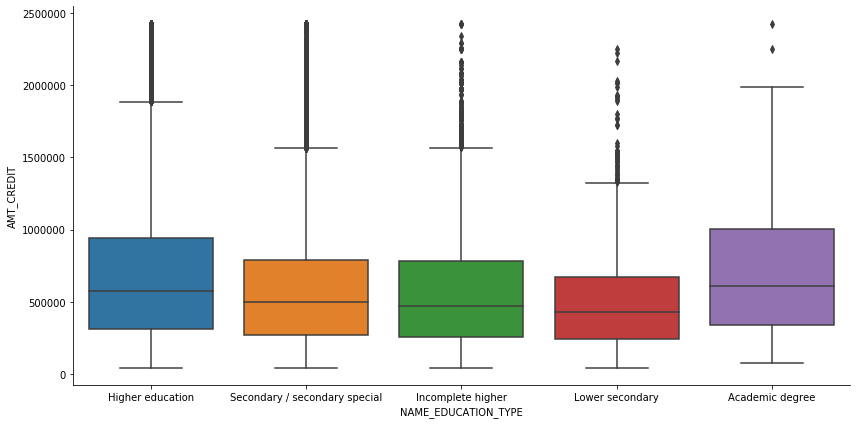

In [277]:
#Is the same pattern observed for non-defaulters as well?
sns.catplot(y="AMT_CREDIT", x="NAME_EDUCATION_TYPE", kind="box", data=df1, height=6,aspect=2)

From the above graph it is clear that,
1. The variation of all the education types are similar for both Defaulters and Non-Defaulters.
2. The only difference is in the box plot of Academic Degree. Here the plot is more spread out. Only 2 outliers are present. More clients are paying there loan and not default.
3. Lower Secondary Education box plot contains more outliers as compare to Default box plot

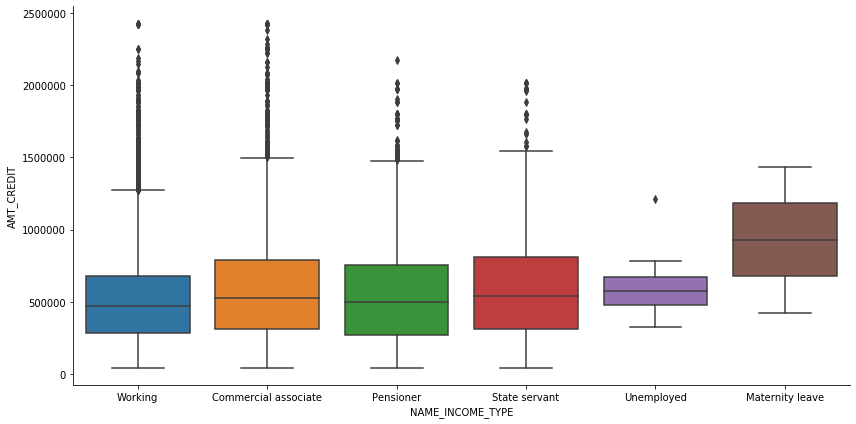

In [278]:
#Defaulters arranged by income type and credit range
sns.catplot(y="AMT_CREDIT", x="NAME_INCOME_TYPE", kind="box", data=df2, height=6,aspect=2)

From the above graph it is clear that,
1. Unemployed box plot is very condensed and data is not varied widely. Wide no of clients are taking loan around 500000 and they are default while paying back 
2. Minimum amount of loan taken by Maternity leave is high and there tendency to default is also high. Box Plot of Maternity leave is similar above and below median. 

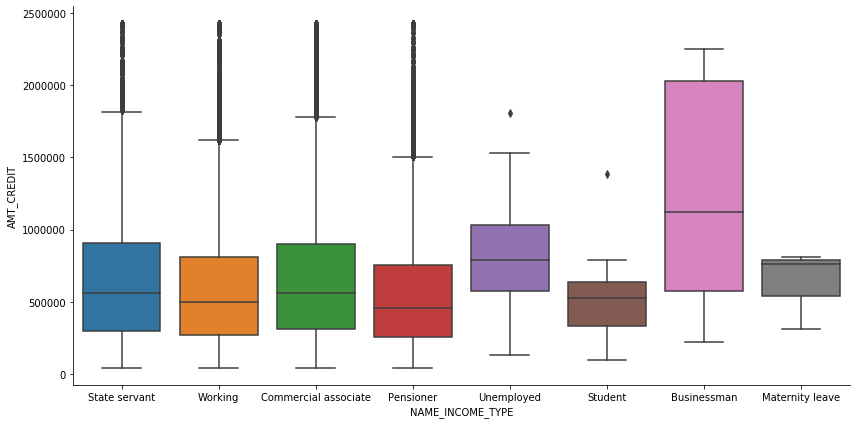

In [279]:
#Is the same pattern observed for non-defaulters as well?
sns.catplot(y="AMT_CREDIT", x="NAME_INCOME_TYPE", kind="box", data=df1, height=6,aspect=2)

From the above graph it is clear that,
1. The box plot of Businessman is very widely distributed above median. More clients are taking loans above 100000. But repaying also
2. The box plot of Maternity Leave above median is very small. Highly densed. No variation in distribution of data.
3. Rest box plots shows similar pattern as for defaulters.

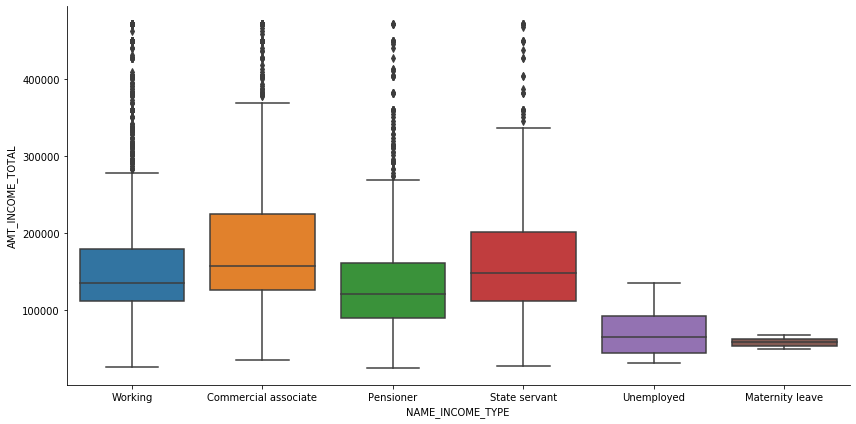

In [280]:
#Defaulters arranged by income type and income total
sns.catplot(y="AMT_INCOME_TOTAL", x="NAME_INCOME_TYPE", kind="box", data=df2, height=6,aspect=2)

From the above graph it is clear that,
1. Maternity leave bocx plot is very very condensed and they are the least defaulters. No outliers
2. In working Box plot, between 3rd Quartile and median the data is widely distributed. Large number of Outliers 
3. Same with Commercial associate, between 3rd Quartile and median the data is widely distributed. Less outliers 
4. Pensioners Box plot almost symmetry is present.

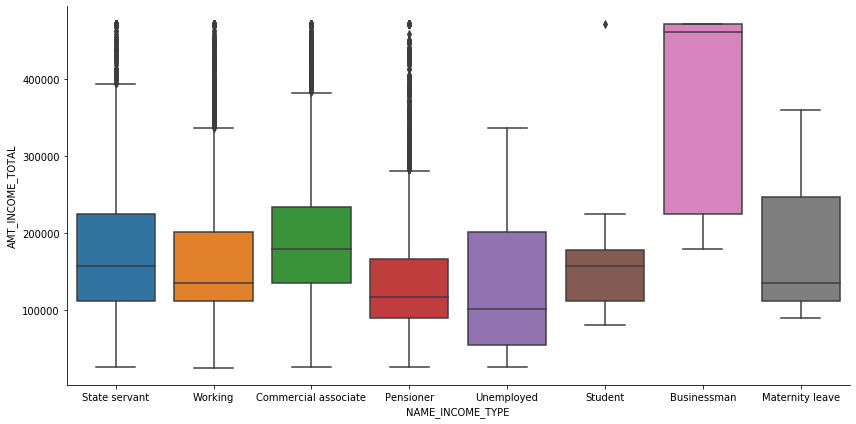

In [281]:
#Is the same pattern observed for non-defaulters as well?
sns.catplot(y="AMT_INCOME_TOTAL", x="NAME_INCOME_TYPE", kind="box", data=df1, height=6,aspect=2)

From the above graph it is clear that,
1. The box plots of income type is same leaving Maternity leave box plot. Here between median and Q3 data is invariably distributed. 
2. Min salary of Businessman is very high as compared to others. data between Q2 & median is widely distributed. Doesn't mean it have more data. Q3 & Q4 are merged and no outliers are present.
3. Pensioner have most nno of outliers.

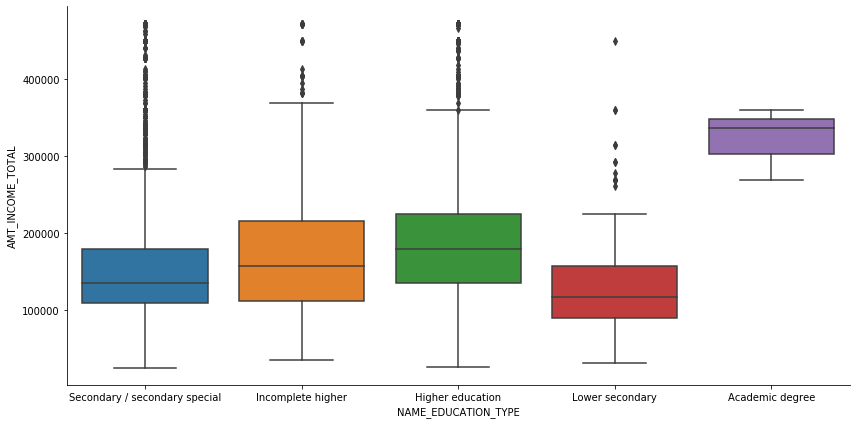

In [282]:
#Defaulters arranged by income type and  education type
sns.catplot(y="AMT_INCOME_TOTAL", x="NAME_EDUCATION_TYPE", kind="box", data=df2, height=6,aspect=2)

From the above graph it is clear that,
1. Academic Degree people have higher income and tends to default more than any other education type. Between Q3 & median the data is condensed and distributed widely. No outliers
2. Lower Secondary education clients havde low income and very less outliers. Q4 quartile is around 200000 which is low and they default less.

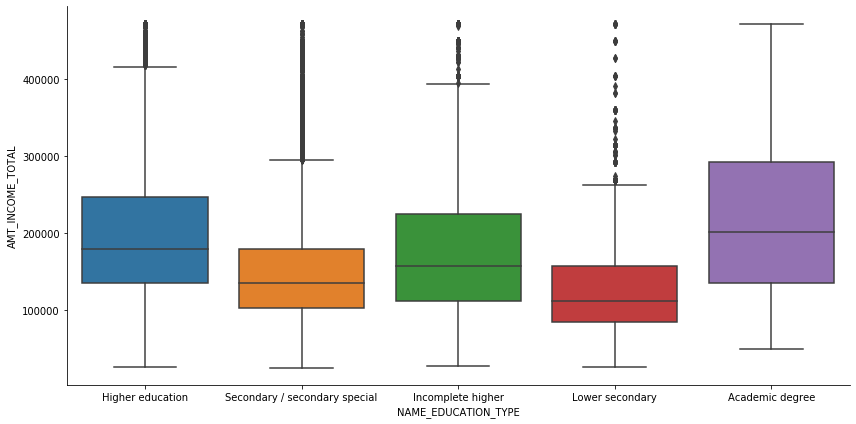

In [283]:
#Is the same pattern observed for non-defaulters as well?
sns.catplot(y="AMT_INCOME_TOTAL", x="NAME_EDUCATION_TYPE", kind="box", data=df1, height=6,aspect=2)

From the above graph it is clear that,
1. Academic degree clients are non defauulter and with those higher income are widely distributed above median and below Q3
2. The rest plots are following almost same pattern as of default clients.

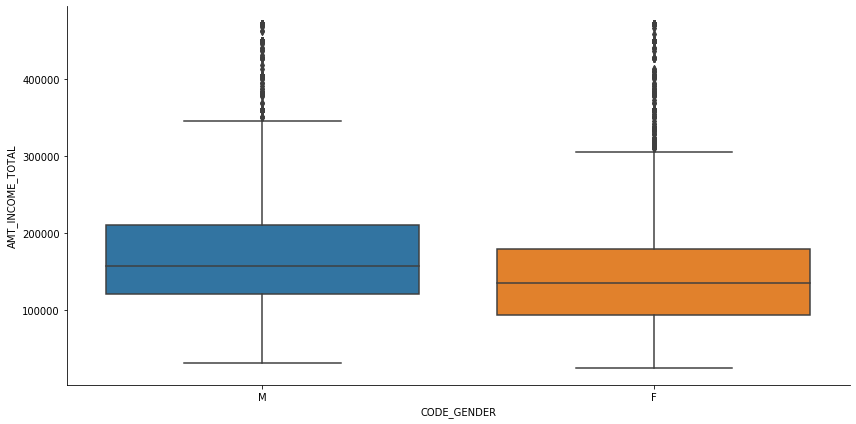

In [284]:
#Defaulters arranged by income type and  gender
sns.catplot(y="AMT_INCOME_TOTAL", x="CODE_GENDER", kind="box", data=df2, height=6,aspect=2)

From the above graph it is clear that,
1. Box plot of Male is symmetrical. Values are evenly distributed. 
2. Box plot of female is also symmetrical.
3. The Median of male is higher than the female means more male are have more income as compare to female.
4. Male are more defaulter than females and have higher income than females.

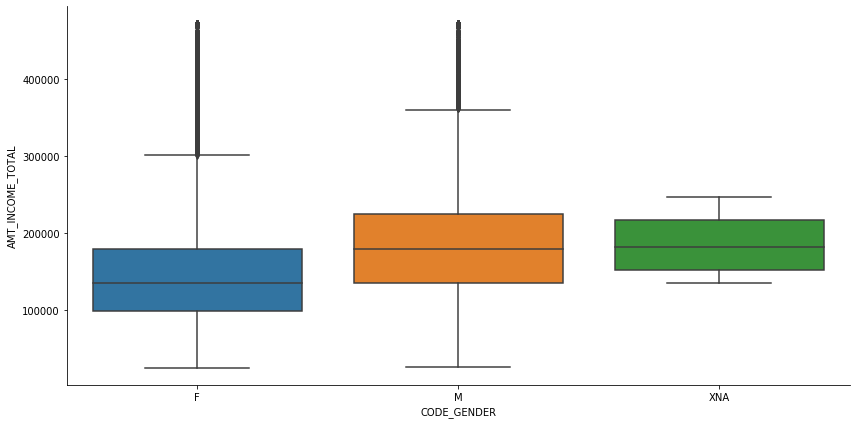

In [285]:
#Is the same pattern observed for non-defaulters as well?
sns.catplot(y="AMT_INCOME_TOTAL", x="CODE_GENDER", kind="box", data=df1, height=6,aspect=2)

From the above graph it is clear that,
1. Box plot of Male is symmetrical. Values are evenly distributed. 
2. Box plot of female is also symmetrical.
3. The Median of male is higher than the female means more male are have more income as compare to female. 

## Conclusion
The variables that significantly contribute to decide whether a person will default or not is as analysed below:
1. Housing Type – Those clients living in Specific Housing tend to default more as compared to those living in Flats 
2. Occupation Type – Laborers tend to default more  as compare to sales staff and Core staff
3. Family Status –  Unmarried clients and clients have civil marriage defaults more as compared to those are married clients.
4. Code Gender – Males default more when compares to female.
4. CNT Children – Those clients have 1 or 2 children defaults more as compare to those clients have 0 children.